In [1]:
import logging
import random
import os

import networkx as nx
import osmnx as ox
from matplotlib import pyplot as plt

import bcnetwork as bc

# Get graph from OSM

## Utils

In [17]:
plot_graph_params = dict(figsize=(20, 20), edge_color='#9e9e9e', node_color='#67ccfc', bgcolor='white')

## Load graph

In [8]:
file_cache = '../instances/treinta-y-tres/treinta_y_tres.yaml'
file_cache_dir = os.path.dirname(file_cache)

# Fix graph import from yaml
if os.path.isfile(file_cache) and False:
    g = nx.read_yaml(file_cache)
else:
    g = bc.graph.as_serializable(
        bc.graph.normalize_osm(
            ox.graph_from_place('Treinta y Tres, Treinta y Tres, Uruguay')
        )
    )
    # Remove edges that make this graph a multigraph so it's supported by glpk
    duplicated_edges = [e for e in g.edges(keys=True) if e[2] > 0]
    g.remove_edges_from(duplicated_edges)
    if not os.path.isdir(file_cache_dir):
        os.mkdir(file_cache_dir)
    nx.write_yaml(g, file_cache)

Nodes: 1509
Edges: 4491
Multigraph: True
Directed: True


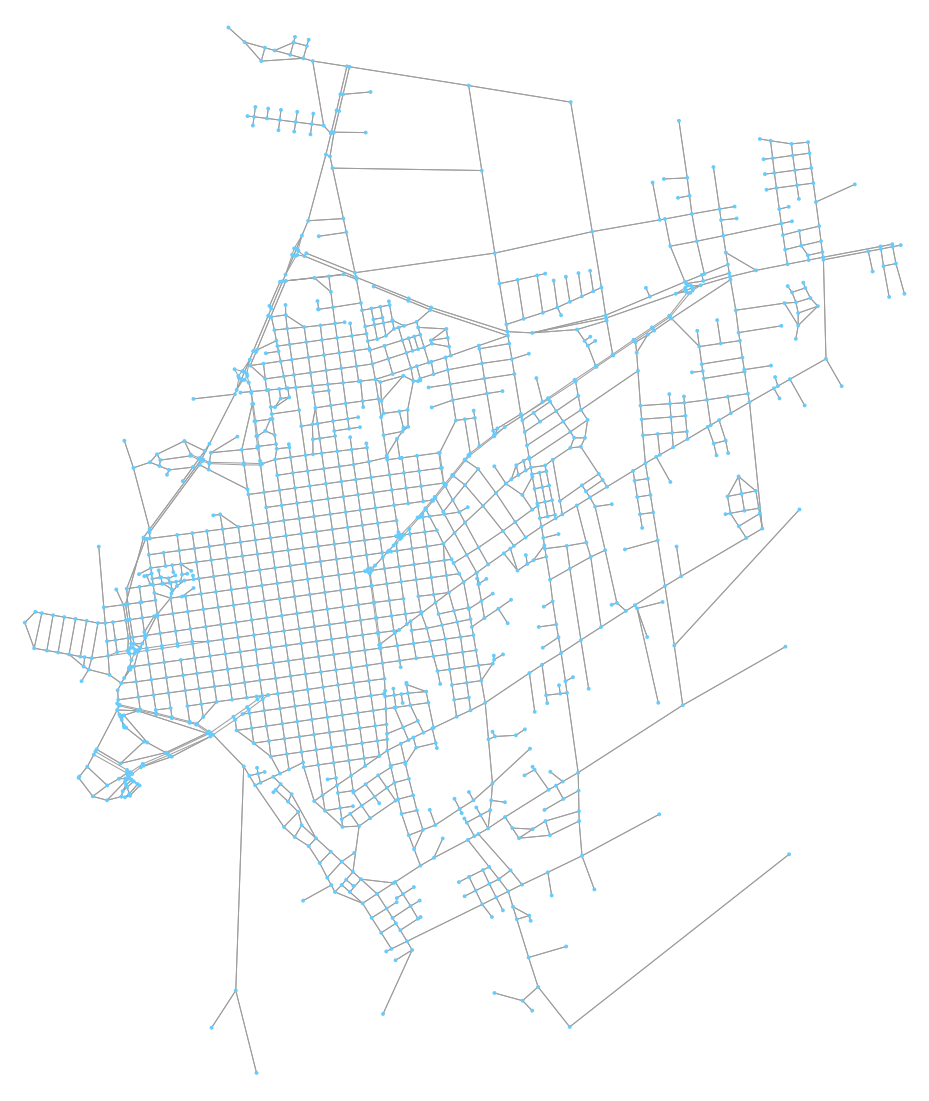

(<Figure size 1440x1440 with 1 Axes>, <AxesSubplot:>)

In [18]:
print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')
print(f'Multigraph: {g.is_multigraph()}')
print(f'Directed: {g.is_directed()}')

ox.plot_graph(g, **plot_graph_params)

## Draw result